In [1]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import scipy.signal

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd
color_pal = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [3]:
from glob import glob

file_list = glob('D:/jupyter notebook/test/*.wav')

# Use a for loop with an index i
for i, file in enumerate(file_list):
    print(f'index {i}: {file}')


index 0: D:/jupyter notebook/test\recorded_audio_juti.wav
index 1: D:/jupyter notebook/test\recorded_audio_rifat.wav
index 2: D:/jupyter notebook/test\recorded_audio_shammi.wav
index 3: D:/jupyter notebook/test\recorded_audio_shanto.wav
index 4: D:/jupyter notebook/test\recorded_audio_shukanto.wav


For File 1:
y:[0.0038147  0.00384521 0.00378418 0.00378418 0.00378418 0.00378418
 0.00378418 0.00372314 0.00375366 0.00372314 0.00375366 0.00375366
 0.00375366 0.00378418 0.00378418 0.00378418 0.0038147  0.0038147
 0.00378418 0.00378418]
shape y:(480000,)
sr:48000


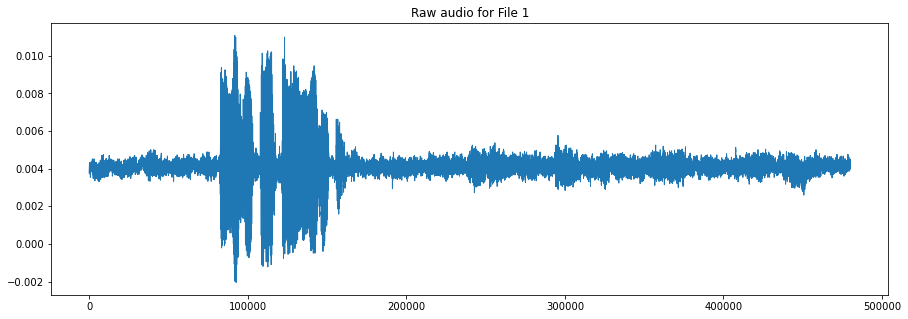

For File 2:
y:[ 5.0354004e-03  4.1809082e-03  3.2653809e-03  2.2888184e-03
  1.1291504e-03 -3.0517578e-05 -1.1901855e-03 -2.2583008e-03
 -3.3569336e-03 -4.5471191e-03 -5.6152344e-03 -6.5307617e-03
 -7.3242188e-03 -8.1481934e-03 -9.0332031e-03 -9.9182129e-03
 -1.0711670e-02 -1.1383057e-02 -1.1993408e-02 -1.2603760e-02]
shape y:(480000,)
sr:48000


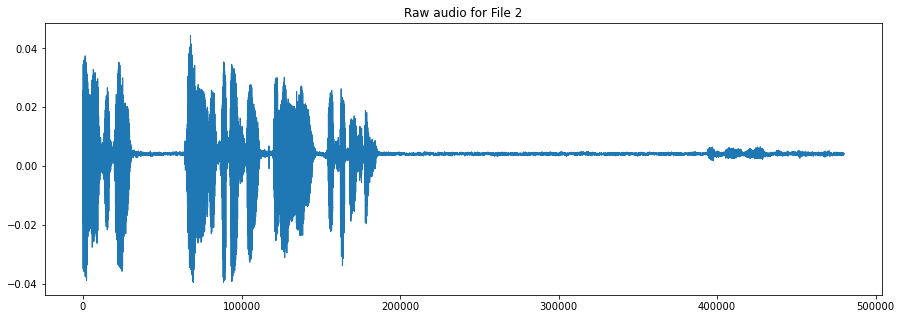

For File 3:
y:[0.00418091 0.00418091 0.00418091 0.00421143 0.00421143 0.00424194
 0.00418091 0.00418091 0.00421143 0.00421143 0.00424194 0.00424194
 0.00418091 0.00421143 0.00424194 0.00418091 0.00421143 0.00421143
 0.00424194 0.00418091]
shape y:(480000,)
sr:48000


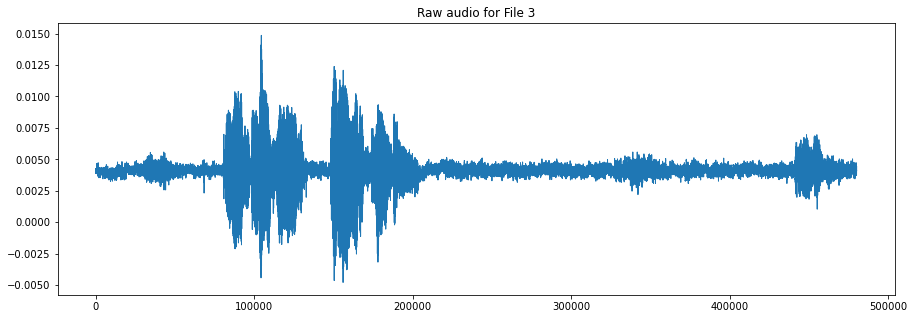

For File 4:
y:[0.0039978  0.00396729 0.00393677 0.00393677 0.00393677 0.00396729
 0.00390625 0.00390625 0.00390625 0.00387573 0.00390625 0.00387573
 0.00384521 0.00384521 0.0038147  0.00384521 0.00387573 0.00384521
 0.0038147  0.00378418]
shape y:(480000,)
sr:48000


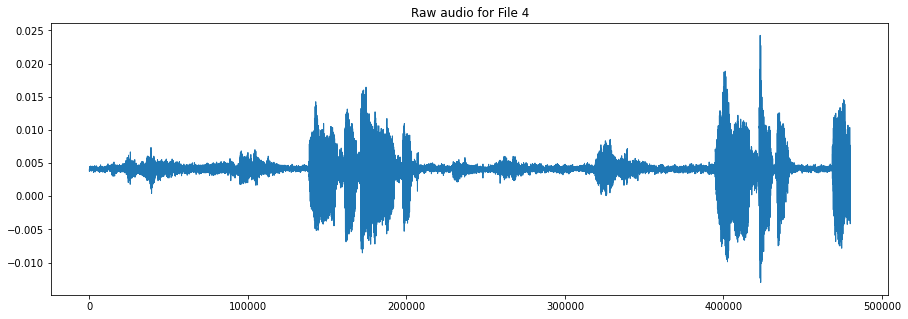

For File 5:
y:[0.00421143 0.00424194 0.00415039 0.00408936 0.00405884 0.00405884
 0.00408936 0.0039978  0.0039978  0.00402832 0.00405884 0.00411987
 0.00408936 0.00411987 0.00411987 0.00408936 0.00415039 0.00411987
 0.00411987 0.00408936]
shape y:(480000,)
sr:48000


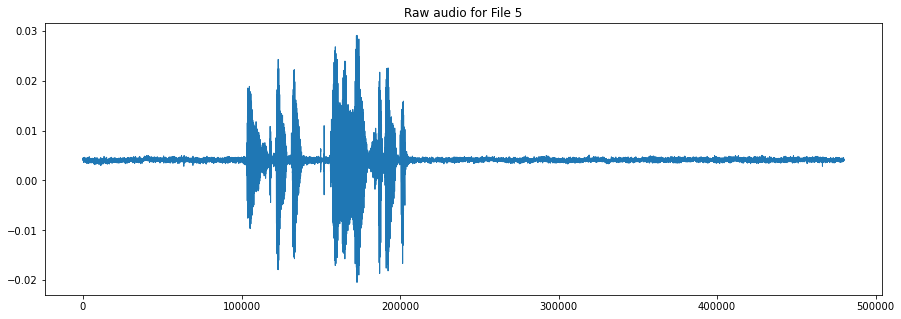

In [4]:
for i, file_path in enumerate(file_list):
    x, sr = librosa.load(file_path, sr=None)

    print(f'For File {i+1}:')
    print(f'y:{x[:20]}')
    print(f'shape y:{x.shape}')
    print(f'sr:{sr}')

    pd.Series(x).plot(figsize=(15, 5), lw=1, title=f'Raw audio for File {i+1}')
    plt.show()


For File 1:
sr:48000


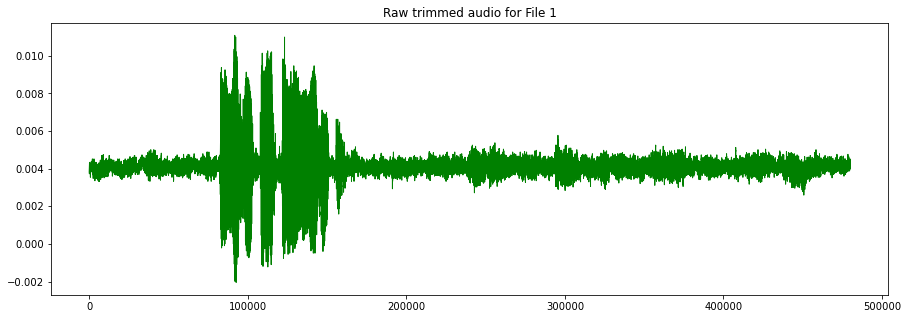

For File 2:
sr:48000


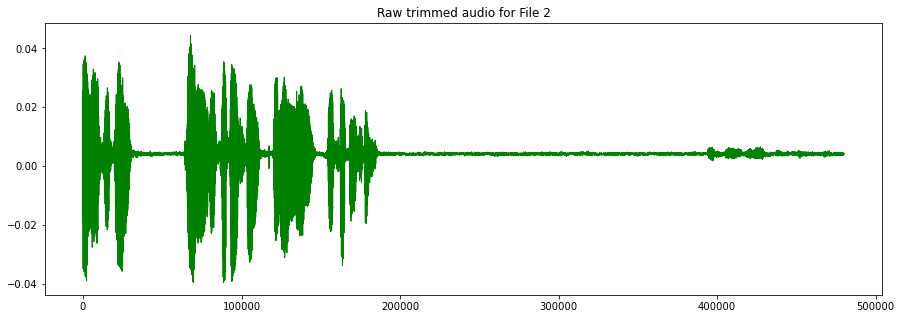

For File 3:
sr:48000


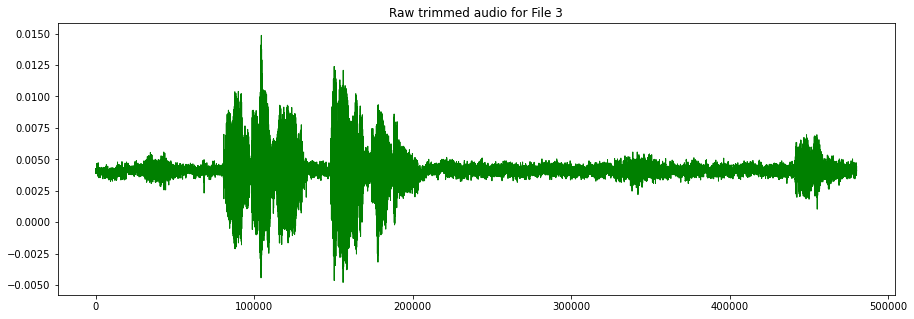

For File 4:
sr:48000


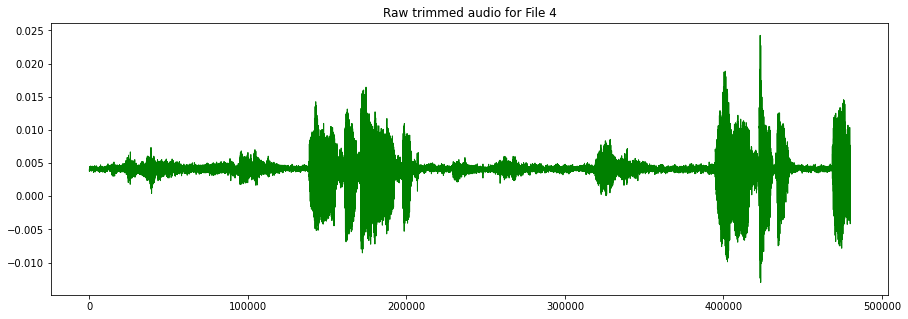

For File 5:
sr:48000


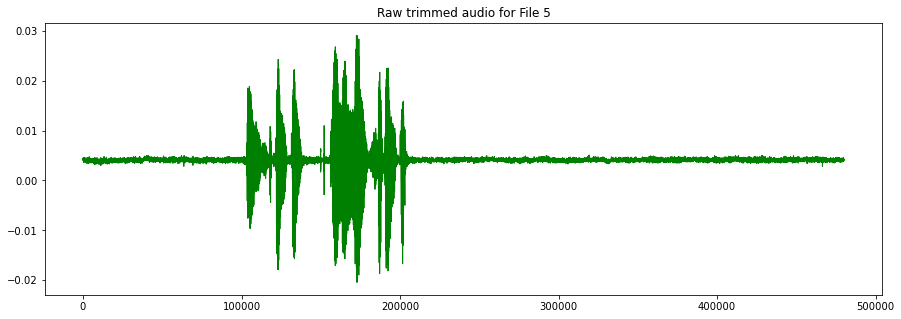

In [5]:
for i, file_path in enumerate(file_list):
    x, sr = librosa.load(file_path, sr=None)

    print(f'For File {i+1}:')
    print(f'sr:{sr}')

    x_trimmed, _ = librosa.effects.trim(x, top_db=20)
    pd.Series(x_trimmed).plot(figsize=(15, 5), lw=1, title=f'Raw trimmed audio for File {i+1}', color='green')
    plt.show()

For File 1:
sr:48000


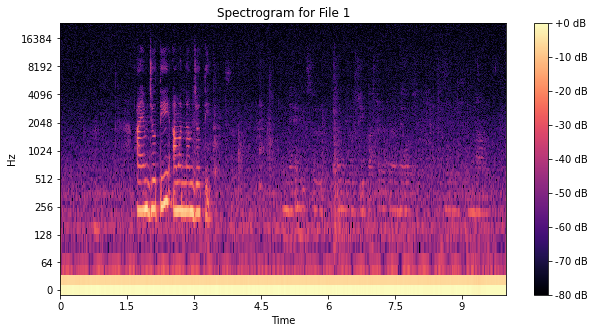

Spectrogram shape: (1025, 938)
For File 2:
sr:48000


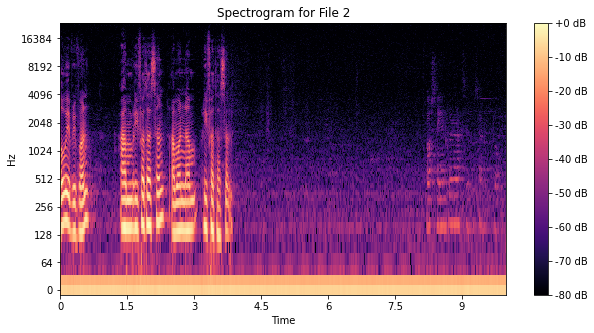

Spectrogram shape: (1025, 938)
For File 3:
sr:48000


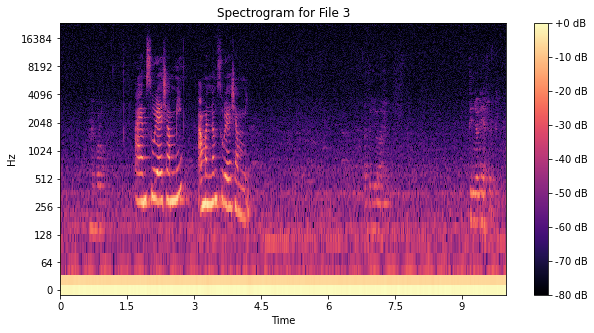

Spectrogram shape: (1025, 938)
For File 4:
sr:48000


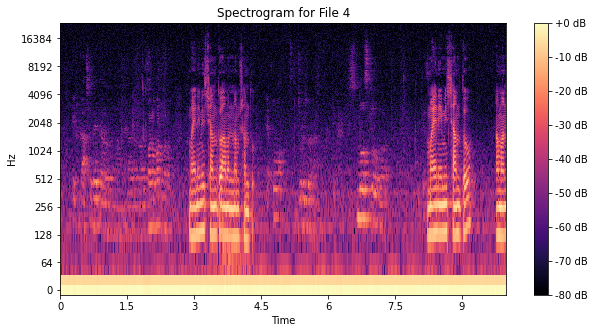

Spectrogram shape: (1025, 938)
For File 5:
sr:48000


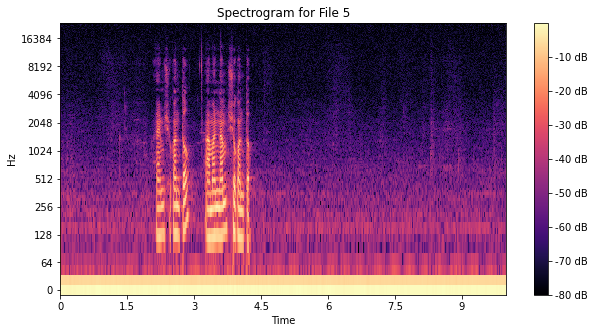

Spectrogram shape: (1025, 938)


In [6]:
for i, file_path in enumerate(file_list):
    x, sr = librosa.load(file_path, sr=None)

    print(f'For File {i+1}:')
    print(f'sr:{sr}')

    D = librosa.stft(x)
    s_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    plt.figure(figsize=(10, 5))
    librosa.display.specshow(s_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram for File {i+1}')
    plt.show()

    print(f'Spectrogram shape: {s_db.shape}')


For File 1:
sr:48000


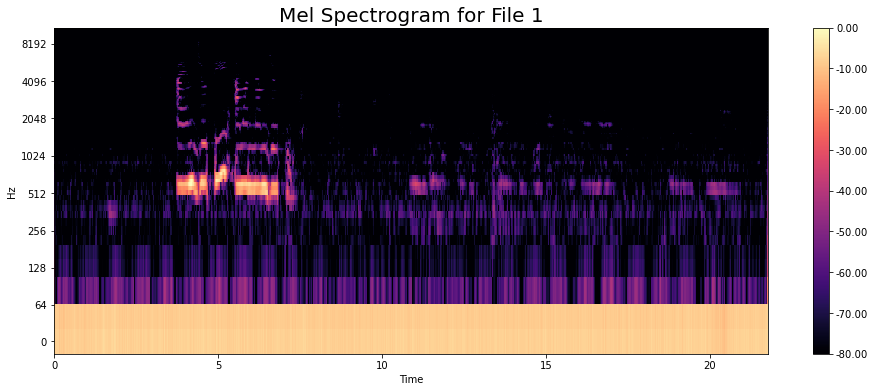

Mel Spectrogram shape: (256, 938)
For File 2:
sr:48000


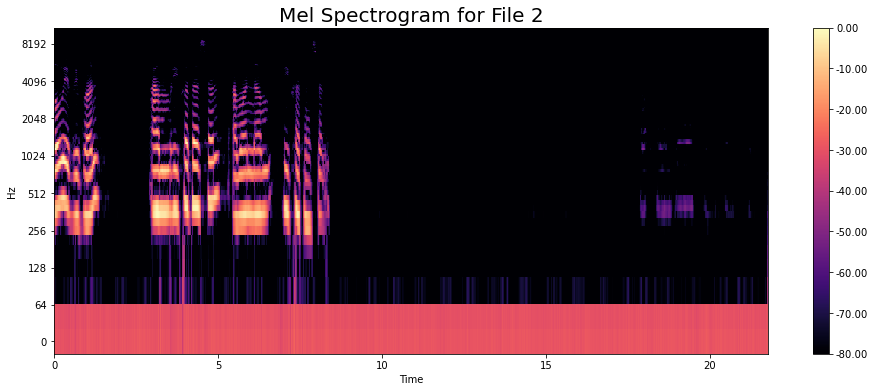

Mel Spectrogram shape: (256, 938)
For File 3:
sr:48000


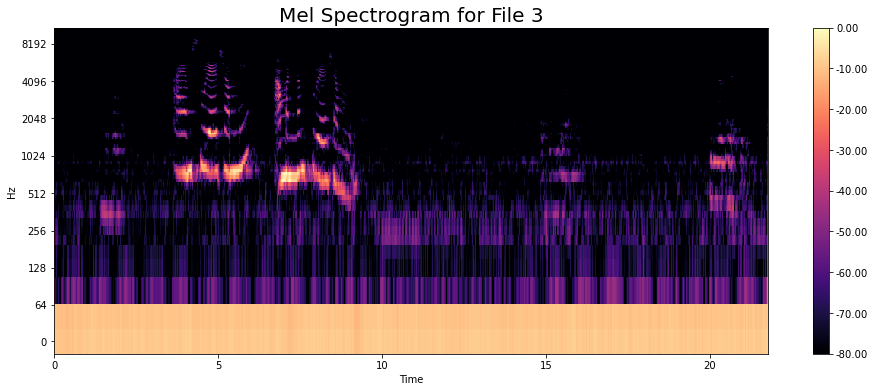

Mel Spectrogram shape: (256, 938)
For File 4:
sr:48000


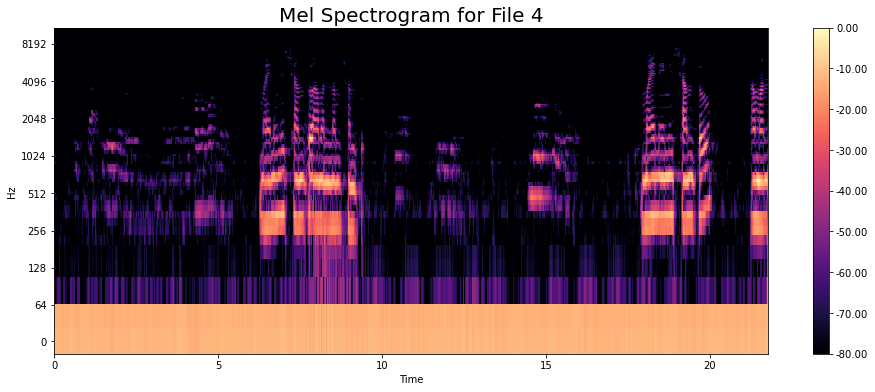

Mel Spectrogram shape: (256, 938)
For File 5:
sr:48000


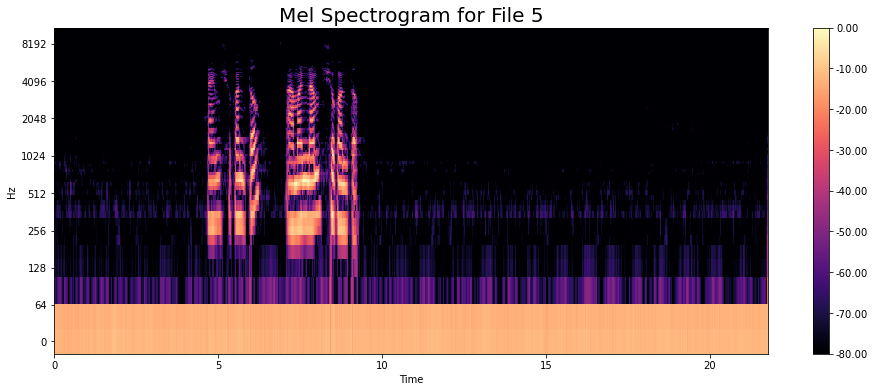

Mel Spectrogram shape: (256, 938)


In [7]:
for i, file_path in enumerate(file_list):
    x, sr = librosa.load(file_path, sr=None)

    print(f'For File {i+1}:')
    print(f'sr:{sr}')

    s = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128*2)
    s_db_mel = librosa.amplitude_to_db(s, ref=np.max)

    fig, ax = plt.subplots(figsize=(16, 6))
    img = librosa.display.specshow(s_db_mel, x_axis='time', y_axis='log', ax=ax)
    ax.set_title(f'Mel Spectrogram for File {i+1}', fontsize=20)
    fig.colorbar(img, ax=ax, format='%0.2f')
    plt.show()

    print(f'Mel Spectrogram shape: {s_db_mel.shape}')


In [8]:
from glob import glob

file_list1 = glob('D:/jupyter notebook/test/trimmed/*.wav')

# Use a for loop with an index i
for i, file in enumerate(file_list1):
    print(f'index {i}: {file}')


index 0: D:/jupyter notebook/test/trimmed\trimmed_audio_juti.wav
index 1: D:/jupyter notebook/test/trimmed\trimmed_audio_rifat.wav
index 2: D:/jupyter notebook/test/trimmed\trimmed_audio_shammi.wav
index 3: D:/jupyter notebook/test/trimmed\trimmed_audio_shanto.wav
index 4: D:/jupyter notebook/test/trimmed\trimmed_audio_shukanto.wav


For File 1:
y:[0.00543213 0.00619507 0.0067749  0.00717163 0.00759888 0.00817871
 0.00881958 0.00909424 0.00897217 0.00860596 0.00820923 0.00799561
 0.00759888 0.00695801 0.00628662 0.00558472 0.00488281 0.00424194
 0.0038147  0.00332642]
shape y:(77076,)
sr:48000


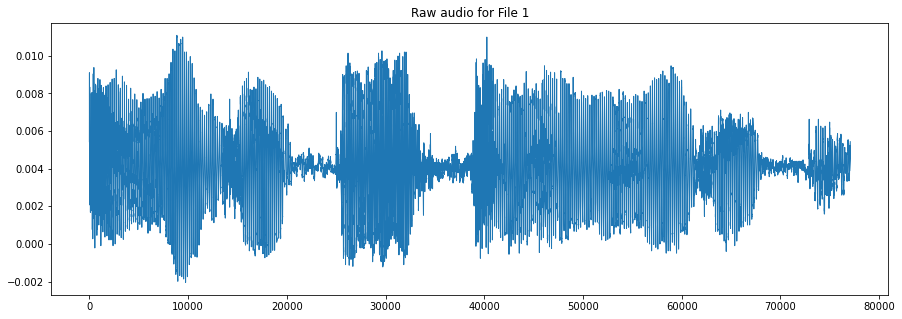

For File 2:
y:[0.00927734 0.00982666 0.00997925 0.01031494 0.01077271 0.01074219
 0.01071167 0.01086426 0.01077271 0.01046753 0.01016235 0.01004028
 0.00952148 0.00906372 0.00866699 0.00814819 0.00756836 0.00738525
 0.00732422 0.00695801]
shape y:(116990,)
sr:48000


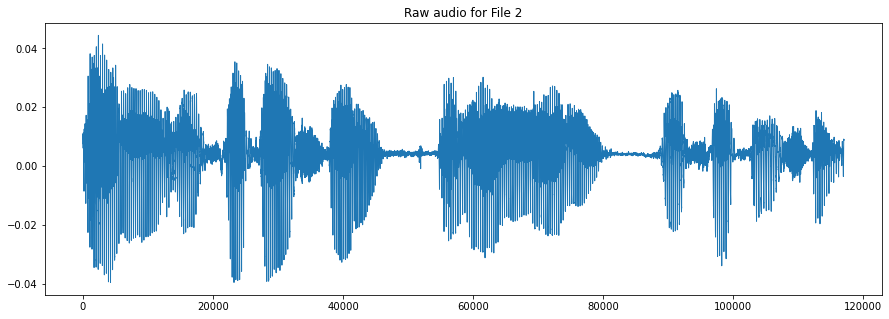

For File 3:
y:[0.00448608 0.00439453 0.00445557 0.00442505 0.00448608 0.00445557
 0.00445557 0.00445557 0.00442505 0.00445557 0.00445557 0.00442505
 0.00445557 0.00445557 0.00445557 0.00442505 0.00439453 0.00442505
 0.00442505 0.00442505]
shape y:(167492,)
sr:48000


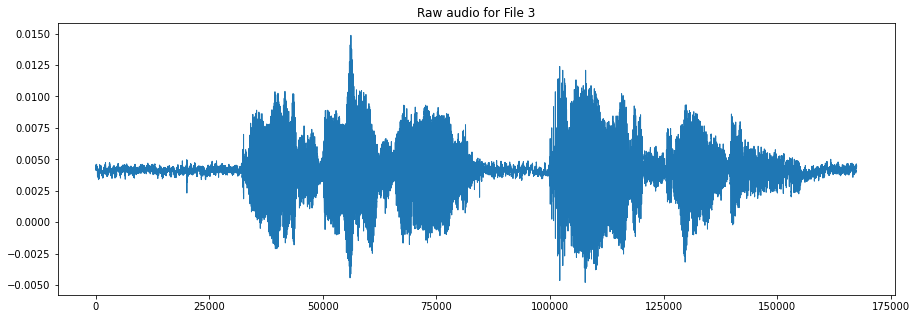

For File 4:
y:[0.00485229 0.00488281 0.00494385 0.00494385 0.00494385 0.00500488
 0.00500488 0.00494385 0.00500488 0.00506592 0.00506592 0.00506592
 0.00506592 0.00509644 0.00509644 0.00512695 0.00515747 0.00512695
 0.00509644 0.00512695]
shape y:(76859,)
sr:48000


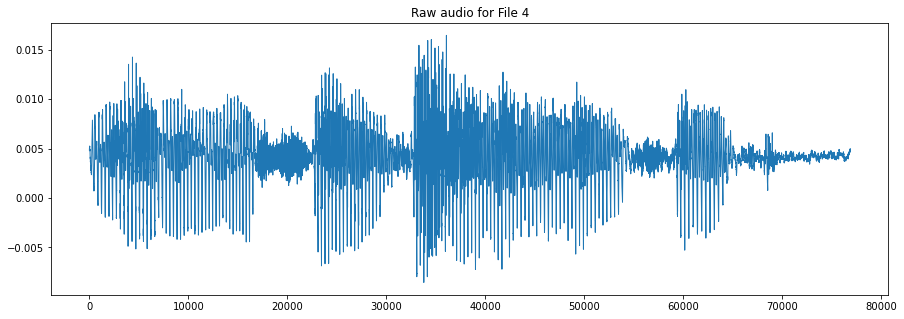

For File 5:
y:[0.00506592 0.00531006 0.00546265 0.0057373  0.00598145 0.00622559
 0.00631714 0.00637817 0.00653076 0.00668335 0.0067749  0.00686646
 0.00689697 0.00692749 0.00689697 0.00692749 0.00689697 0.00698853
 0.00701904 0.00689697]
shape y:(151341,)
sr:48000


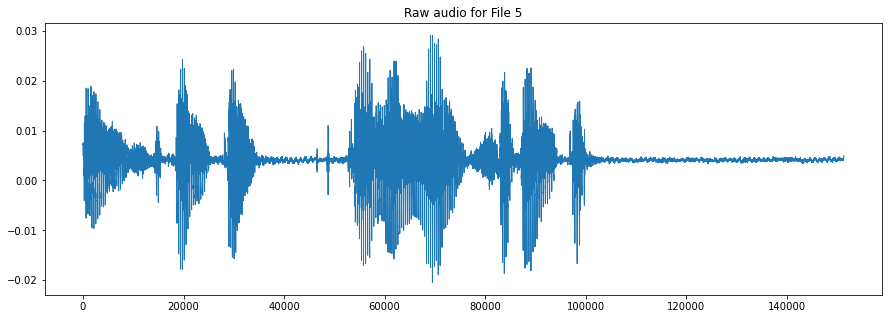

In [9]:
for i, file_path in enumerate(file_list1):
    y, sr = librosa.load(file_path, sr=None)

    print(f'For File {i+1}:')
    print(f'y:{y[:20]}')
    print(f'shape y:{y.shape}')
    print(f'sr:{sr}')

    pd.Series(y).plot(figsize=(15, 5), lw=1, title=f'Raw audio for File {i+1}')
    plt.show()

For File 1:
sr:48000


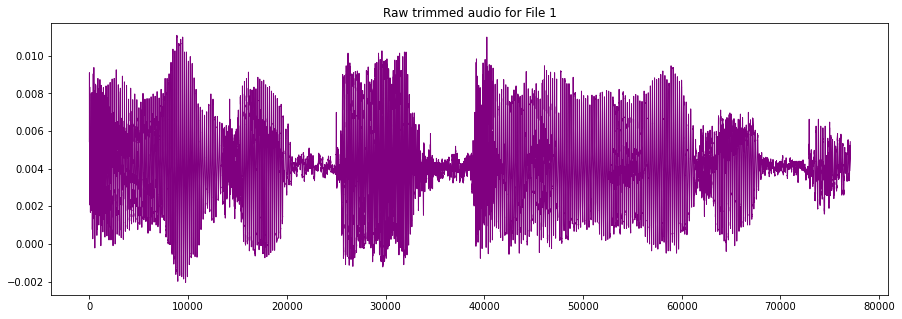

For File 2:
sr:48000


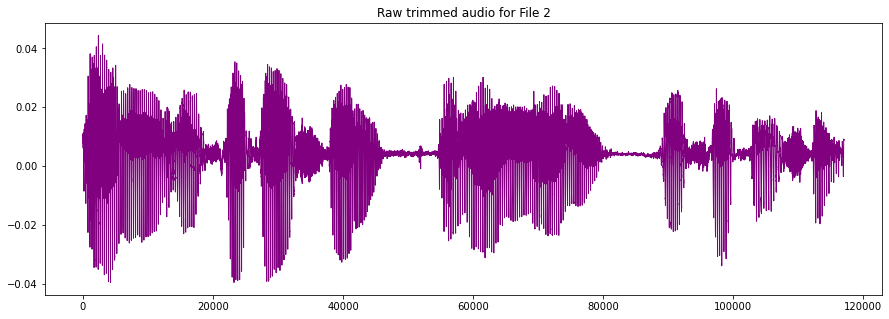

For File 3:
sr:48000


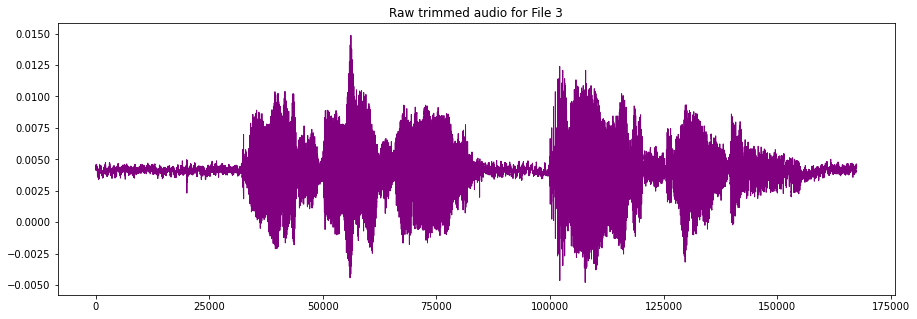

For File 4:
sr:48000


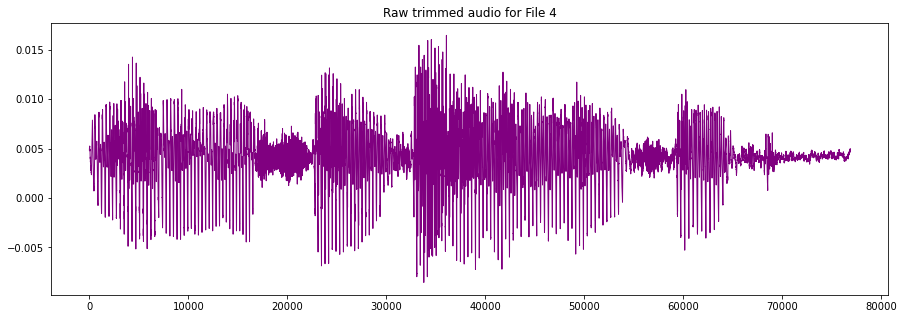

For File 5:
sr:48000


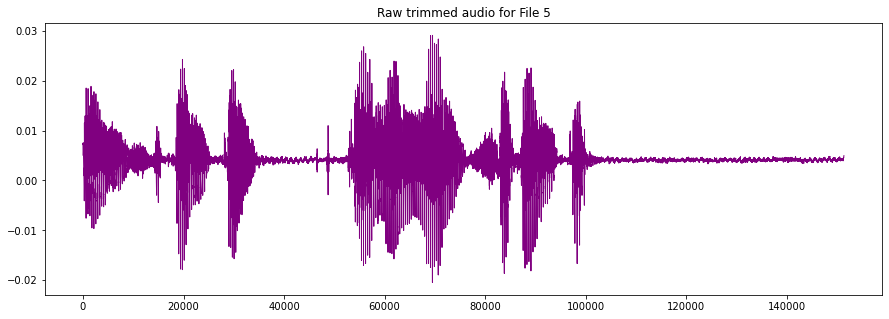

In [10]:
for i, file_path in enumerate(file_list1):
    y, sr = librosa.load(file_path, sr=None)

    print(f'For File {i+1}:')
    print(f'sr:{sr}')

    y_trimmed, _ = librosa.effects.trim(y, top_db=20)
    pd.Series(y_trimmed).plot(figsize=(15, 5), lw=1, title=f'Raw trimmed audio for File {i+1}', color='purple')
    plt.show()

For File 1:
sr:48000


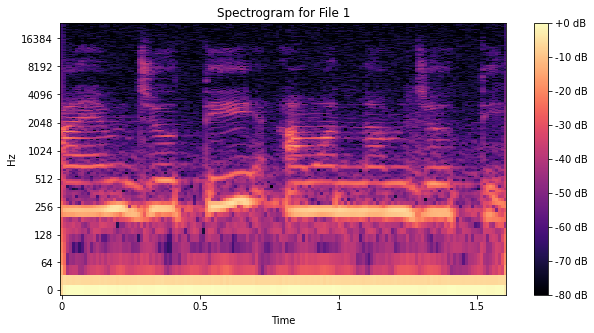

Spectrogram shape: (1025, 151)
For File 2:
sr:48000


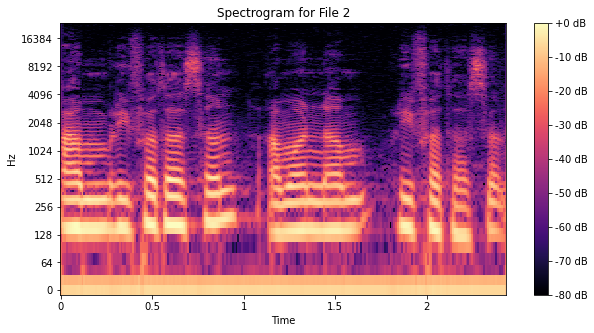

Spectrogram shape: (1025, 229)
For File 3:
sr:48000


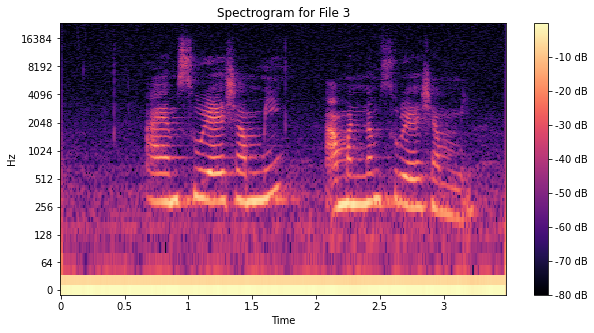

Spectrogram shape: (1025, 328)
For File 4:
sr:48000


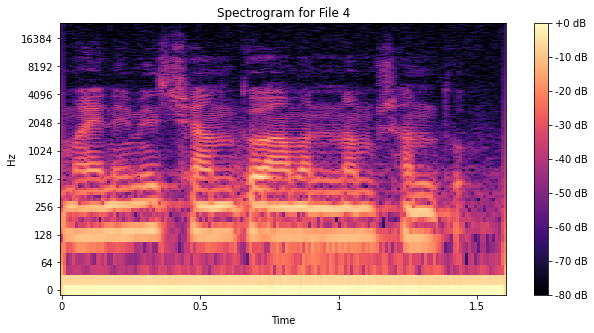

Spectrogram shape: (1025, 151)
For File 5:
sr:48000


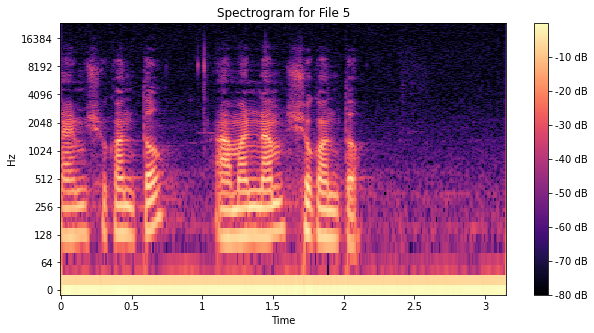

Spectrogram shape: (1025, 296)


In [11]:
for i, file_path in enumerate(file_list1):
    y, sr = librosa.load(file_path, sr=None)

    print(f'For File {i+1}:')
    print(f'sr:{sr}')

    D = librosa.stft(y)
    s_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    plt.figure(figsize=(10, 5))
    librosa.display.specshow(s_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram for File {i+1}')
    plt.show()

    print(f'Spectrogram shape: {s_db.shape}')

For File 1:
sr:48000


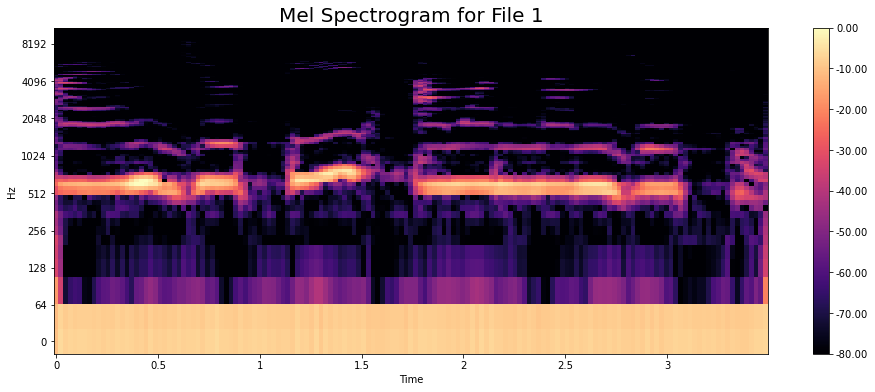

Mel Spectrogram shape: (256, 151)
For File 2:
sr:48000


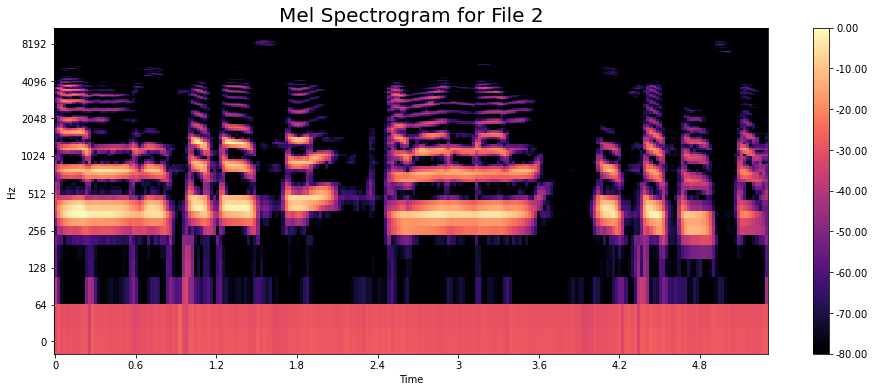

Mel Spectrogram shape: (256, 229)
For File 3:
sr:48000


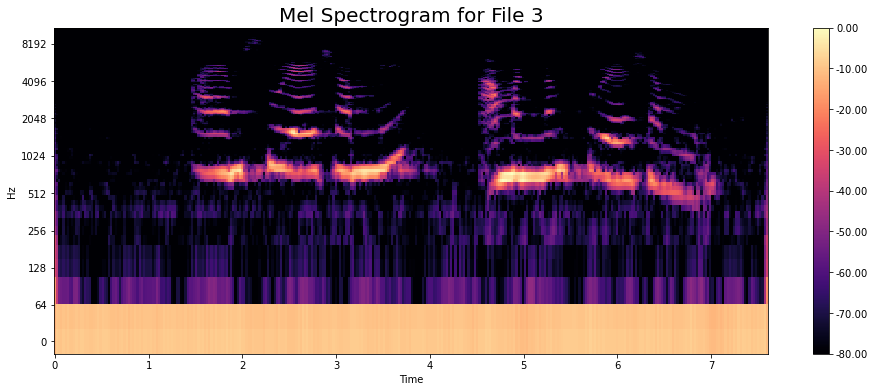

Mel Spectrogram shape: (256, 328)
For File 4:
sr:48000


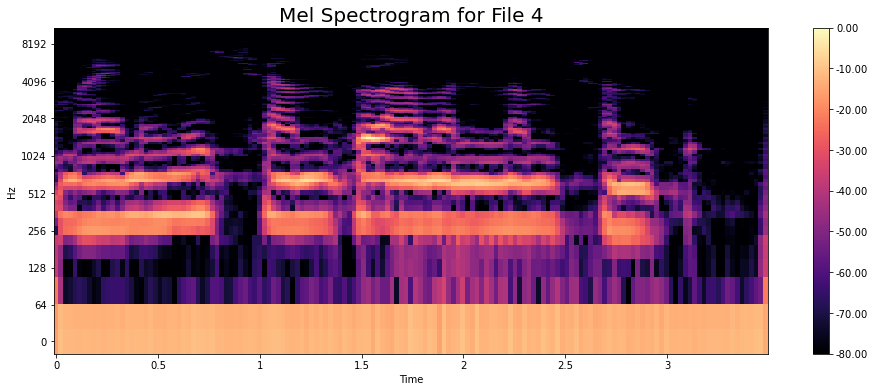

Mel Spectrogram shape: (256, 151)
For File 5:
sr:48000


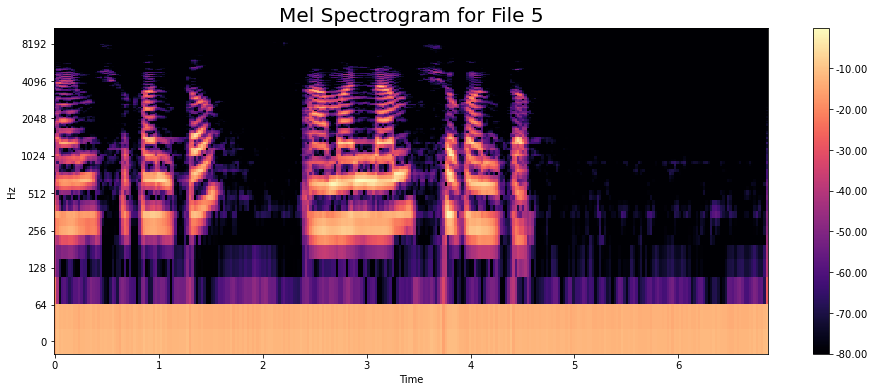

Mel Spectrogram shape: (256, 296)


In [12]:
for i, file_path in enumerate(file_list1):
    y, sr = librosa.load(file_path, sr=None)

    print(f'For File {i+1}:')
    print(f'sr:{sr}')

    s = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128*2)
    s_db_mel = librosa.amplitude_to_db(s, ref=np.max)

    fig, ax = plt.subplots(figsize=(16, 6))
    img = librosa.display.specshow(s_db_mel, x_axis='time', y_axis='log', ax=ax)
    ax.set_title(f'Mel Spectrogram for File {i+1}', fontsize=20)
    fig.colorbar(img, ax=ax, format='%0.2f')
    plt.show()

    print(f'Mel Spectrogram shape: {s_db_mel.shape}')

In [13]:
import librosa
from scipy.io.wavfile import write

def trim_audio(input_file, output_file, start_time_ms=0, end_time_ms=None, threshold=0.5):
    y, sr = librosa.load(input_file, sr=None)
    
    # Convert times to samples
    start_sample = int(start_time_ms * (sr / 1000))
    if end_time_ms is not None:
        end_sample = int(end_time_ms * (sr / 1000))
    else:
        end_sample = len(y)
    
    # Calculate absolute amplitude
    amplitude = abs(y)
    
    # Threshold for considering as speech
    threshold_amplitude = threshold * max(amplitude)
    
    # Find the start and end times with speech
    start_time = start_sample
    end_time = end_sample
    
    while start_time < end_sample and amplitude[start_time] < threshold_amplitude:
        start_time += 1
    
    while end_time > start_sample and amplitude[end_time-1] < threshold_amplitude:
        end_time -= 1
    
    # Trim the audio
    trimmed_audio = y[start_time:end_time]
    
    # Save the trimmed audio using scipy.io.wavfile.write
    write(output_file, sr, trimmed_audio)

# Example usage:
input_file = file_list[4]
output_file = 'D:/jupyter notebook/test/trimmed_audio_shukanto.wav'

# Trim from 2 seconds to 6 seconds
trim_audio(input_file, output_file, start_time_ms=1500, end_time_ms=6000, threshold=0.17)


In [14]:
import IPython.display as ipd
ipd.Audio(file_list1[0])

In [15]:
import librosa

def analyze_audio(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path)
    
    # Example: Calculate the mean and standard deviation of the audio signal
    mean_amplitude = y.mean()
    std_amplitude = y.std()
    
    return mean_amplitude, std_amplitude

# Analyze each audio file
for i, file_path in enumerate(file_list1):
    mean_amp, std_amp = analyze_audio(file_path)
    print(f'File {i}: Mean Amplitude = {mean_amp}, Standard Deviation = {std_amp}')


File 0: Mean Amplitude = 0.0041146972216665745, Standard Deviation = 0.002177915535867214
File 1: Mean Amplitude = 0.004105440340936184, Standard Deviation = 0.009936299175024033
File 2: Mean Amplitude = 0.0041234781965613365, Standard Deviation = 0.0018306541023775935
File 3: Mean Amplitude = 0.004140394739806652, Standard Deviation = 0.00298588490113616
File 4: Mean Amplitude = 0.004111706279218197, Standard Deviation = 0.00342355202883482


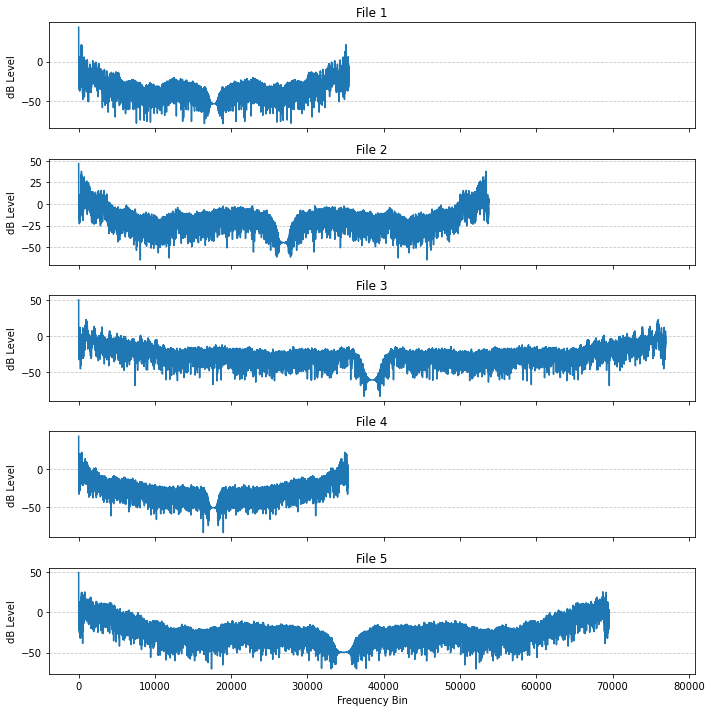

In [16]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def analyze_audio(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path)
    
    # Calculate DFT
    dft = np.abs(np.fft.fft(y))
    
    # Calculate dB levels
    db_levels = 20 * np.log10(dft)
    
    return db_levels

# Create subplots
fig, axes = plt.subplots(len(file_list1), 1, figsize=(10, 10), sharex=True)

# Analyze each audio file and plot the results
for i, file_path in enumerate(file_list1):
    db_levels = analyze_audio(file_path)
    
    # Plot the dB levels
    axes[i].plot(db_levels)
    axes[i].set_title(f'File {i+1}')
    
    # Set y-axis label
    axes[i].set_ylabel('dB Level')
    
    # Add horizontal gridlines for better readability
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
    
# Set x-axis label
axes[-1].set_xlabel('Frequency Bin')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


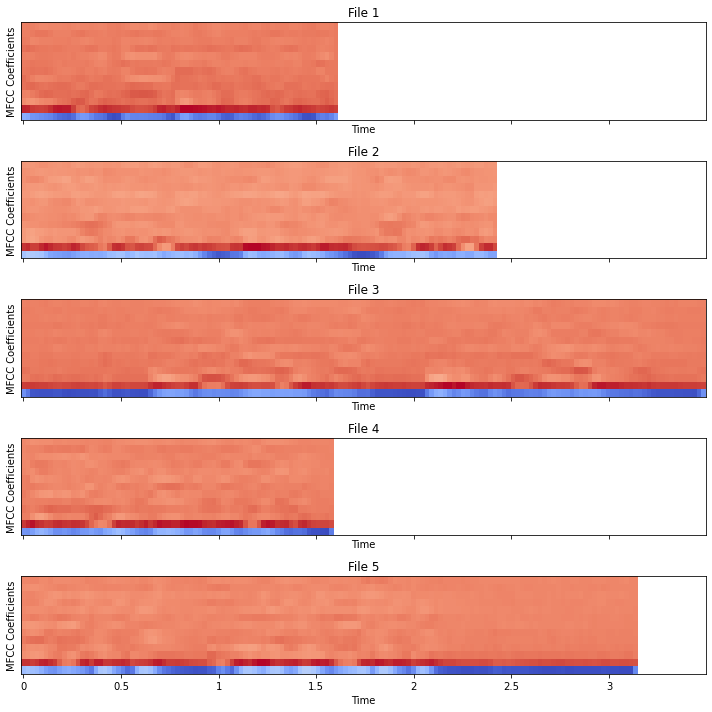

In [17]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

def analyze_audio_mfcc(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path)
    
    # Calculate MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    
    return mfccs, sr

# Create subplots
fig, axes = plt.subplots(len(file_list1), 1, figsize=(10, 10), sharex=True)

# Analyze each audio file and plot the MFCCs
for i, file_path in enumerate(file_list1):
    mfccs, sr = analyze_audio_mfcc(file_path)
    
    # Plot the MFCCs
    librosa.display.specshow(mfccs, sr=sr, x_axis='time', ax=axes[i])
    axes[i].set_title(f'File {i+1}')
    
    # Set y-axis label
    axes[i].set_ylabel('MFCC Coefficients')
    
    # Add horizontal gridlines for better readability
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)

# Set x-axis label
axes[-1].set_xlabel('Time')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [18]:
import librosa
import numpy as np

def analyze_audio(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path)
    
    # Calculate pitch
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    mean_pitches = np.mean(pitches)
    
    # Calculate harmonics-to-noise ratio (HNR)
    hnr = librosa.effects.harmonic(y)
    mean_hnr = np.mean(hnr)
    
    return mean_pitches, mean_hnr

# Analyze each audio file and store the results
results = []

# Assuming file_list1 contains the paths to the audio files
for i, file_path in enumerate(file_list1):
    mean_pitches, mean_hnr = analyze_audio(file_path)
    results.append((mean_pitches, mean_hnr))

# Determine which files likely contain male/female voices
male_indices = []
female_indices = []

# Set a threshold for pitch difference
pitch_threshold = .5  # Adjust as needed

for i, (mean_pitches, mean_hnr) in enumerate(results):
    # If the mean pitch is below the threshold and HNR is relatively high, it's likely female
    if mean_pitches < pitch_threshold and mean_hnr > 10:
        female_indices.append(i)
    else:
        male_indices.append(i)

# Print the results
print(f"Likely male speakers are in files: {male_indices}")
print(f"Likely female speakers are in files: {female_indices}")


Likely male speakers are in files: [0, 1, 2, 3, 4]
Likely female speakers are in files: []


In [19]:
import librosa

def calculate_pitch(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path)
    
    # Calculate pitch
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    mean_pitch = np.mean(pitches)
    
    return mean_pitch

# Assuming file_list1 contains the paths to the audio files
for i, file_path in enumerate(file_list1):
    mean_pitch = calculate_pitch(file_path)
    print(f'File {i+1}: Mean Pitch = {mean_pitch} Hz')


File 1: Mean Pitch = 0.28782713413238525 Hz
File 2: Mean Pitch = 2.0839948654174805 Hz
File 3: Mean Pitch = 0.32698914408683777 Hz
File 4: Mean Pitch = 0.6434334516525269 Hz
File 5: Mean Pitch = 1.4468837976455688 Hz


In [20]:
import librosa

def calculate_pitch(file_path):
    # Load the audio file and normalize
    y, sr = librosa.load(file_path)
    y = librosa.util.normalize(y)
    
    # Calculate pitch
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    mean_pitch = np.mean(pitches)
    
    return mean_pitch

# Assuming file_list1 contains the paths to the audio files
for i, file_path in enumerate(file_list1):
    mean_pitch = calculate_pitch(file_path)
    print(f'File {i+1}: Mean Pitch = {mean_pitch} Hz')


File 1: Mean Pitch = 0.28782713413238525 Hz
File 2: Mean Pitch = 2.0839948654174805 Hz
File 3: Mean Pitch = 0.32698914408683777 Hz
File 4: Mean Pitch = 0.6434334516525269 Hz
File 5: Mean Pitch = 1.4468837976455688 Hz


In [21]:
import librosa

def analyze_audio(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path)
    
    # Normalize the audio
    y = librosa.util.normalize(y)
    
    # Calculate mean amplitude
    mean_amplitude = y.mean()
    
    # Calculate dB levels
    dft = np.abs(np.fft.fft(y))
    db_levels = 20 * np.log10(dft)
    
    return mean_amplitude, db_levels

# Analyze each audio file
for i, file_path in enumerate(file_list1):
    mean_amp, db_levels = analyze_audio(file_path)
    print(f'File {i+1}: Mean Amplitude = {mean_amp}, Mean dB Level = {np.mean(db_levels)}')


File 1: Mean Amplitude = 0.3724420666694641, Mean dB Level = 7.449250714004249
File 2: Mean Amplitude = 0.09371741116046906, Mean dB Level = 11.77253758453939
File 3: Mean Amplitude = 0.2777581214904785, Mean dB Level = 12.3986452863498
File 4: Mean Amplitude = 0.2519703507423401, Mean dB Level = 9.10221783834504
File 5: Mean Amplitude = 0.14245358109474182, Mean dB Level = 8.777643736863393


In [22]:
import librosa

def analyze_audio(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path)
    
    # Normalize the audio
    y = librosa.util.normalize(y)
    
    # Calculate mean amplitude
    mean_amplitude = y.mean()
    
    # Calculate dB levels
    dft = np.abs(np.fft.fft(y))
    db_levels = 20 * np.log10(dft)
    
    # Calculate pitch
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    mean_pitch = np.mean(pitches)
    
    # Calculate harmonics
    harmonics = np.mean(magnitudes, axis=0)
    
    return mean_amplitude, np.mean(db_levels), mean_pitch, harmonics

# Analyze each audio file
for i, file_path in enumerate(file_list1):
    mean_amp, mean_db, mean_pitch, harmonics = analyze_audio(file_path)
    print(f'File {i+1}: Mean Amplitude = {mean_amp}, Mean dB Level = {mean_db}, Mean Pitch = {mean_pitch} Hz')
    print(f'Mean Harmonics = {harmonics}')


File 1: Mean Amplitude = 0.3724420666694641, Mean dB Level = 7.449250714004249, Mean Pitch = 0.28782713413238525 Hz
Mean Harmonics = [0.09727971 0.0992998  0.111411   0.11177077 0.11156733 0.1153819
 0.1401294  0.18823287 0.23557612 0.228108   0.12486555 0.10366606
 0.06309203 0.09358263 0.11546256 0.20091295 0.21402223 0.16050158
 0.04483694 0.         0.         0.         0.         0.11249878
 0.18217269 0.1627299  0.16496111 0.1684214  0.1777177  0.14352484
 0.0689874  0.         0.         0.         0.         0.05122988
 0.15051442 0.13642824 0.14850451 0.14791499 0.14567049 0.14544922
 0.144751   0.16388085 0.16424602 0.15285833 0.1516284  0.14764133
 0.13428386 0.12694584 0.1363156  0.16456479 0.18751794 0.18500489
 0.13097018 0.11738066 0.04874698 0.11987715 0.15675057 0.1515616
 0.08746177 0.04241817 0.         0.         0.         0.
 0.         0.03829293 0.         0.02404047]
File 2: Mean Amplitude = 0.09371741116046906, Mean dB Level = 11.77253758453939, Mean Pitch = 

In [23]:
import librosa

def calculate_pitch(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path)
    
    # Calculate pitch
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    mean_pitch = pitches.mean()
    
    return mean_pitch

# Usage:
file_path = file_list[0]
mean_pitch = calculate_pitch(file_path)
print(f'Mean Pitch = {mean_pitch} Hz')


Mean Pitch = 0.04040510579943657 Hz


In [24]:
import librosa

def analyze_audio(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=48000)

    # Calculate pitch
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

    # Assuming you want to get the mean pitch
    mean_pitch = pitches[pitches > 0].mean()

    return mean_pitch

for i, file_path in enumerate(file_list1):
    pitch = analyze_audio(file_path)
    print(f"File {i+1}: Mean Pitch = {pitch} Hz")


File 1: Mean Pitch = 361.1545715332031 Hz
File 2: Mean Pitch = 635.362548828125 Hz
File 3: Mean Pitch = 582.1265869140625 Hz
File 4: Mean Pitch = 500.62921142578125 Hz
File 5: Mean Pitch = 705.4544677734375 Hz


In [25]:
import librosa

# Load the audio file
y, sr = librosa.load(file_list1[0], sr=48000)


In [26]:
# Optional: Normalize the audio
y = librosa.util.normalize(y)


In [27]:
# Calculate pitch using YIN algorithm
f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C1'), fmax=librosa.note_to_hz('C8'))


In [28]:
mean_pitch = f0[f0 > 0].mean()
pitch_range = f0[f0 > 0].max() - f0[f0 > 0].min()

print(f"Mean Pitch: {mean_pitch} Hz")
print(f"Pitch Range: {pitch_range} Hz")


Mean Pitch: 108.8526038538951 Hz
Pitch Range: 109.35393584602767 Hz


In [29]:
import librosa

def analyze_audio(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=48000)

    # Calculate pitch using YIN algorithm
    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C1'), fmax=librosa.note_to_hz('C8'))

    # Assuming you want to get the mean pitch and pitch range
    mean_pitch = f0[f0 > 0].mean()
    pitch_range = f0[f0 > 0].max() - f0[f0 > 0].min()

    return mean_pitch, pitch_range


for i, file_path in enumerate(file_list1):
    mean_pitch, pitch_range = analyze_audio(file_path)
    print(f"File {i+1}:")
    print(f"Mean Pitch: {mean_pitch} Hz")


File 1:
Mean Pitch: 108.8526038538951 Hz
File 2:
Mean Pitch: 71.70500109038441 Hz
File 3:
Mean Pitch: 111.27129204647254 Hz
File 4:
Mean Pitch: 58.18791946394446 Hz
File 5:
Mean Pitch: 53.80010065516203 Hz


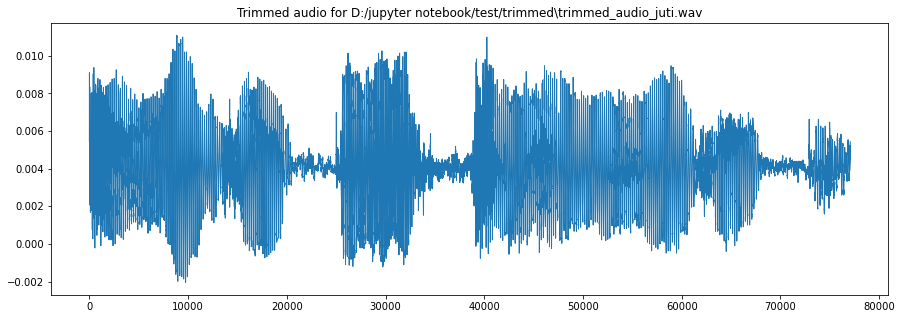

File 1:
Mean Pitch: 108.8526038538951 Hz


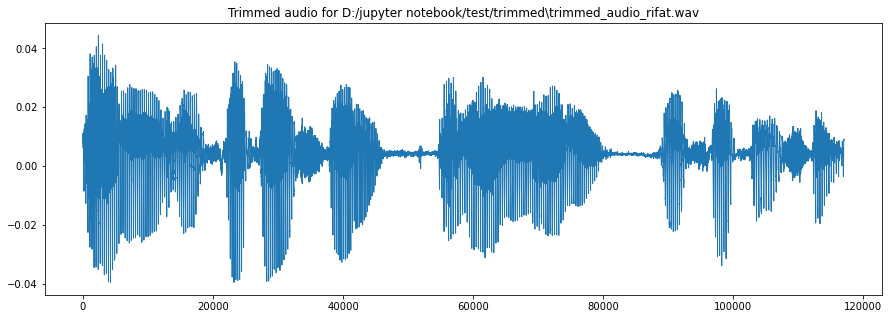

File 2:
Mean Pitch: 71.70500109038441 Hz


In [ ]:
import librosa
import matplotlib.pyplot as plt
import pandas as pd

def analyze_audio(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=48000)

    # Trim silent sections
    y_trimmed, _ = librosa.effects.trim(y, top_db=20)

    # Calculate pitch using YIN algorithm
    f0, voiced_flag, voiced_probs = librosa.pyin(y_trimmed, fmin=librosa.note_to_hz('C1'), fmax=librosa.note_to_hz('C8'))

    # Assuming you want to get the mean pitch and pitch range
    mean_pitch = f0[f0 > 0].mean()
    pitch_range = f0[f0 > 0].max() - f0[f0 > 0].min()

    # Visualize the trimmed audio
    pd.Series(y_trimmed).plot(figsize=(15, 5), lw=1, title=f'Trimmed audio for {file_path}')
    plt.show()

    return mean_pitch, pitch_range

for i, file_path in enumerate(file_list1):
    mean_pitch, pitch_range = analyze_audio(file_path)
    print(f"File {i+1}:")
    print(f"Mean Pitch: {mean_pitch} Hz")


In [ ]:
import librosa

def noise_reduce(y, sr):
    # Apply a noise reduction technique (e.g., spectral subtraction, wavelet denoising, etc.)
    # Example: You can use the `noisereduce` library for noise reduction
    # Make sure to install it first using `pip install noisereduce`
    import noisereduce as nr
    reduced_audio = nr.reduce_noise(y, sr)
    return reduced_audio

def analyze_audio(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=48000)
    
    # Apply noise reduction
    y = noise_reduce(y, sr)

    # Calculate pitch using YIN algorithm
    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C1'), fmax=librosa.note_to_hz('C8'))

    # Assuming you want to get the mean pitch and pitch range
    mean_pitch = f0[f0 > 0].mean()
    pitch_range = f0[f0 > 0].max() - f0[f0 > 0].min()

    return mean_pitch, pitch_range

for i, file_path in enumerate(file_list1):
    mean_pitch, pitch_range = analyze_audio(file_path)
    print(f"File {i+1}:")
    print(f"Mean Pitch: {mean_pitch} Hz")
    print(f"Pitch Range: {pitch_range} Hz")


In [ ]:
import librosa

def analyze_audio(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=48000)

    # Calculate pitch using YIN algorithm
    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C1'), fmax=librosa.note_to_hz('C8'))

    # Assuming you want to get the mean pitch and pitch range
    valid_f0 = f0[f0 > 0]  # Filter out non-positive values

    mean_pitch = valid_f0.mean()
    pitch_range = valid_f0.max() - valid_f0.min()
    max_pitch = valid_f0.max()
    min_pitch = valid_f0.min()

    return mean_pitch, pitch_range, max_pitch, min_pitch

# Assuming file_list1 is a list of file paths
for i, file_path in enumerate(file_list1):
    mean_pitch, pitch_range, max_pitch, min_pitch = analyze_audio(file_path)
    print(f"File {i+1}:")
    print(f"Mean Pitch: {mean_pitch} Hz")
    print(f"Pitch Range: {pitch_range} Hz")
    print(f"Max Pitch: {max_pitch} Hz")
    print(f"Min Pitch: {min_pitch} Hz")



In [ ]:
import librosa
import numpy as np

def analyze_audio(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=48000)

    # 1. Fundamental Frequency (Pitch)
    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C1'), fmax=librosa.note_to_hz('C8'))
    mean_pitch = f0[f0 > 0].mean()

    # 2. Pitch Range
    pitch_range = f0[f0 > 0].max() - f0[f0 > 0].min()



    # 4. Resonance and Timbre (Could use more advanced techniques)
    # Example: Apply a Fourier Transform and analyze frequency content

    # 5. Articulation and Pronunciation (This would require more advanced natural language processing techniques)

    # 6. Intensity (Loudness)
    intensity = np.mean(librosa.feature.rms(y=y))

    # 7. Speech Rate and Rhythm (More complex analysis required)
    # Example: Use prosody analysis techniques

    # 8. Vocal Fry (Would require specialized analysis)
    # Example: Use a pitch analysis algorithm

    # 9. Diction and Vocabulary (Would require natural language processing techniques)

    # 10. Sociolect and Accent (Would require specialized analysis)
    # Example: Use dialect identification techniques

    return mean_pitch, pitch_range, intensity


for i, file_path in enumerate(file_list1):
    mean_pitch, pitch_range, intensity = analyze_audio(file_path)

    print(f"Analysis for File {i+1}:")
    print(f"1. Fundamental Frequency (Pitch): {mean_pitch} Hz")
    print(f"2. Pitch Range: {pitch_range} Hz")
 
    print(f"4. Intensity: {intensity}")
    print("="*30)


In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

def analyze_audio(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=48000)

    # Calculate pitch using YIN algorithm
    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C1'), fmax=librosa.note_to_hz('C8'))

    # Assuming you want to get the mean pitch and pitch range
    valid_f0 = f0[f0 > 0]  # Filter out non-positive values

    mean_pitch = valid_f0.mean()
    pitch_range = valid_f0.max() - valid_f0.min()
    max_pitch = valid_f0.max()
    min_pitch = valid_f0.min()
    
    # Calculate standard deviation and variance
    std_dev = np.std(valid_f0)
    variance = np.var(valid_f0)

    # Plot pitch
    plt.figure(figsize=(10, 6))
    plt.plot(f0)
    plt.xlabel('Frame')
    plt.ylabel('Pitch (Hz)')
    plt.title(f'Pitch - {os.path.basename(file_path)}')  # Include the file name in the plot title
    plt.show()

    return mean_pitch, pitch_range, max_pitch, min_pitch, std_dev, variance

# Assuming file_list1 is a list of file paths
for i, file_path in enumerate(file_list1):
    mean_pitch, pitch_range, max_pitch, min_pitch, std_dev, variance = analyze_audio(file_path)
    print(f"File {i+1}: {os.path.basename(file_path)}")
    print(f"Mean Pitch: {mean_pitch} Hz")
    print(f"Pitch Range: {pitch_range} Hz")
    print(f"Max Pitch: {max_pitch} Hz")
    print(f"Min Pitch: {min_pitch} Hz")
    print(f"Standard Deviation: {std_dev} Hz")
    print(f"Variance: {variance} Hz^2")


In [ ]:
def calculate_hnr(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=48000)

    # Calculate pitch and harmonic-to-noise ratio using YIN algorithm
    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C1'), fmax=librosa.note_to_hz('C8'))
    hnr = librosa.effects.harmonic(y)

    return hnr

# Assuming file_list1 is a list of file paths
for i, file_path in enumerate(file_list1):
    hnr = calculate_hnr(file_path)
    print(f"File {i+1}: {file_path}")
    print(f"Harmonic-to-Noise Ratio (HNR): {np.mean(hnr)}")

In [ ]:
from scipy.signal import lfilter, lpc

def calculate_formants(file_path, lpc_order):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=48000)

    # Apply pre-emphasis to the signal
    pre_emphasis = 0.97  # Adjust as needed
    y = lfilter([1, -pre_emphasis], [1], y)

    # Calculate LPC coefficients
    a, e, k = lpc(y, lpc_order)

    # Calculate roots of the LPC polynomial
    roots = np.roots(a)

    # Convert roots to frequencies (in Hz)
    # Only keep the real roots (formants)
    formants = np.sort(np.abs(roots[(np.imag(roots) >= 0) & (np.abs(roots) < 1)]))

    return formants

# Assuming file_list1 is a list of file paths
lpc_order = 4  # You can adjust this based on your specific application

for i, file_path in enumerate(file_list1):
    formants = calculate_formants(file_path, lpc_order)
    print(f"File {i+1}: {file_path}")
    print(f"Formants (in Hz): {formants}")

In [ ]:
!pip install pysptk

In [ ]:
import librosa
import numpy as np

def calculate_spectral_envelope(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=48000)

    # Calculate the Short-Time Fourier Transform (STFT)
    D = np.abs(librosa.stft(y))

    # Calculate the spectral envelope
    spectral_envelope = librosa.amplitude_to_db(D, ref=np.max)

    return spectral_envelope

# Assuming file_list1 is a list of file paths
for i, file_path in enumerate(file_list1):
    spectral_envelope = calculate_spectral_envelope(file_path)
    print(f"File {i+1}: {file_path}")
    print(f"Spectral Envelope: {spectral_envelope}")


In [ ]:
import matplotlib.pyplot as plt

def plot_spectral_envelope(spectral_envelope, file_path):
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(spectral_envelope, x_axis='time', sr=48000)
    plt.colorbar()
    plt.ylabel('Frequency Bands')
    plt.title(f'Spectral Envelope - {file_path}')
    plt.show()

# Assuming file_list1 is a list of file paths
for i, file_path in enumerate(file_list1):
    spectral_envelope = calculate_spectral_envelope(file_path)
    plot_spectral_envelope(spectral_envelope, file_path)
